# Overview

In this workshop you will write code to recognize hand-written digits. We will use the [UCI ML Hand-Written Digits dataset](https://scikit-learn.org/stable/datasets/index.html#optical-recognition-of-handwritten-digits-dataset), which contains 5620 labeled examples. Scikit-learn [includes 1797 examples](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) that comprise only the test portion of the UCI dataset; we will use it as both the train and test set. To attempt to recognize the characters, we will use one of the most popular algorithms in ML: [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression).

## Logistic Regression

Logistic Regression (also called "Logit") is a supervised learning algorithm that is specialized to do classification. It is extremely fast and offers good results for a wide variety of ML problems. Other algorithms such as neural networks can achieve higher accuracy; Logit will often give a good enough answer for a lot less compute. Even when you intend to use a more advanced algorithm, it can be useful to start with Logit to get a baseline accuracy against which you can compare the more advanced algorithm.

## Glossary
**Classification:** Classification is the act of assigning a label to a new example based on its similarity to previously examined examples.

**Feature:** Observable characteristics that can be converted into machine-readable values that a machine learning algorithm can consider in creating a model that allows prediction of a target value. Total purchases in the past 90 days is a feature that can help predict the amount of purchasing in the next 90 days. See also 'X'.

**Labeled Example:** In Machine Learning, "Labeling" is the act of assigning a known or proposed target value to an example. Our test dataset of 1797 examples of hand-written digits has been correctly labeled with a target value saying which digit each example is. This allows us to experiment with supervised and unsupervised learning.

**Linear Regression:** This means that each individual feature is assumed to have a linear relationship in determining whether an example is a member of a set. For example, digits with a straight vertical line might look very much like a 1 or 4, a little like a 7, and very little like a 2 or 6. The longer, straighter, and more vertical the line, the more strongly we would believe that the digit was a 1 or 4.

**Matrix:** A two-dimensional array, typically containing multiple features for multiple examples.

**Memorization:** When a model has very high prediction accuracy against the training set but performs poorly against new data, it is said to have memorized the training set. This is the cause of a model being overfit.

**Model:** A trained machine learning algorithm that is capable of predicting a target value when presented with an observed set of features.

**Multi-Dimensional:** A multi-dimensional algorithm considers multiple features simultaneously. A multi-dimensional facial recognition system might use eye color, hair color, and eye separation distance as three of the features it considers.

**Overfitting:** A machine learning model that has been trained to have a high accuracy with a previously observed set of data but does not perform well against new data is said to be overfit. It is often caused by memorization of the features in the observed data.

**Supervised Learning:** In supervised learning, we use a training set of data that has already been characterized. We tell the algorithm, "These 400 examples are of the digit 1." This makes the results far more accurate than unsupervised learning.

**Target:** A value that we would like to be able to predict based on other observed values called features. If we want to predict how many units of a book will sell within the next week, we might look at its current place on the New York Times best seller list and the trend of the title in Google searches. See also 'y'.

**Test Set** A portion of the entire dataset that is reserved for testing the effectiveness of a trained model. This data is not included when training the model, ensuring that our algorithm has provided a solution that can be generalized to previously unobserved data.

**Training Set** A portion of the entire dataset that is used to train the model. This data is not included when evaluating the predictive accuracy of our the trained model so that we do not misinterpret overfitting for generalizable accuracy.

**Unsupervised Learning:** In unsupervised learning, we only give the algorithm the examples without telling it what they mean. This significantly reduces the resulting performance and is most practical when we do not have a labeled set of example data to work with.

**Vector:** A one-dimensional array of scalar values.

**X:** A matrix of features encoded as scalar values for a set of examples.

**y:** A vector of target values encoded as scalars for a set of examples.

# Part 1: The Dataset

This code shows how to load the sample dataset. [Scikit-learn](https://scikit-learn.org/stable/index.html) is a popular library of Machine Learning tools. Scikit-learn's [datasets](https://scikit-learn.org/stable/datasets/index.html#toy-datasets) package has 7 well known example datasets to experiment with.

After loading the data, there are a few lines showing some Python tricks for introspecting objects, then we take a look at what is contained in this dataset.

The **images** field has the grayscale intensity from 0 - 15 in an 8x8 grid representing 64 4-bit pixels per digit. The **data** field has the same data reshaped as a linear array to fit the ML algorithms. And the **target** field contains the label telling us what the actual digit is.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import inspect

digits = load_digits()

# Introspection
print "\ndigits type:\n" + str(type(digits))
print "\ndigits dir:\n" + str(dir(digits))

print "\ndigits.images type:\n" + str(type(digits.images))
print "\ndigits.data[0] type:\n" + str(type(digits.data[0]))

print "\nImage:\n" + str(digits.images[0])
print "\nData:\n" + str(digits.data[0])

print "\nNum Examples: " + str(len(digits.images))



digits type:
<class 'sklearn.utils.Bunch'>

digits dir:
['DESCR', 'data', 'images', 'target', 'target_names']

digits.images type:
<type 'numpy.ndarray'>

digits.data[0] type:
<type 'numpy.ndarray'>

Image:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Data:
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

Num Examples: 1797


# Part 2: The Digits

Now we will take a look at the digit images using Matplotlib. We could simply plot the **image** field directly; instead we will use the [numpy reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) method that we will need later. It allows us to reshape arrays from one dimensional to two dimensional, or the reverse, or from any number of dimensions to any other. Here we use it to shape the linear array of grayscale values back into its original 8x8 image layout.

Matplotlib is a library for data visualization, pyplot is its python implementation. Here we use its image plotting method [pyplot.imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) to show the images. Later we will use [pyplot.bar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html) to create bar charts.

I've also defined a function for displaying the images in a two-row grid, since we'll be doing this a few times.

In [2]:
import math
import matplotlib.pyplot as plt

def imshow_arrays(img_arrays, num_cols = 5):
    n_images = len(img_arrays)
    num_rows = math.ceil((1.0 * n_images) / num_cols)
    plt.figure(figsize=(12, 5), dpi=60)
    plt.gray()
    for i in range(n_images):
        img_array = img_arrays[i]
        img = img_array.reshape(8,8)
        position = 1 + i
        plt.subplot(num_rows, num_cols, position)
        plt.imshow(img)

imshow_arrays(digits.data[0:10], 5)

# Part 3: Display With Histograms

In addition to displaying the digits, we will want to display a histogram showing the number of predictions that matched for each digit, and which other numbers generated incorrect matches for each digit. This function will do that for us.

In [3]:
def imshow_and_histogram(img_arrays, counts, num_cols=5):
    n_images = len(img_arrays)
    num_rows = math.ceil((2.0 * n_images) / num_cols)
    plt.figure(figsize=(12,8), dpi=80)
    plt.gray()
    for i in range(n_images):
        img = img_arrays[i].reshape(8,8)
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img)
        plt.subplot(num_rows, num_cols, i + 11)
        plt.bar(range(10), counts[i], tick_label=range(10))
        plt.tight_layout()


# Part 4: Logistic Regression

We are given the labels for these images, which allows us to do supervised learning. Logistic regression is a fast classification algorithm that is applicable to many problems. It provides results that are good enough in many cases and is often used to establish a baseline accuracy when doing trials with more advanced algorithms.

CPU times: user 438 ms, sys: 0 ns, total: 438 ms
Wall time: 439 ms


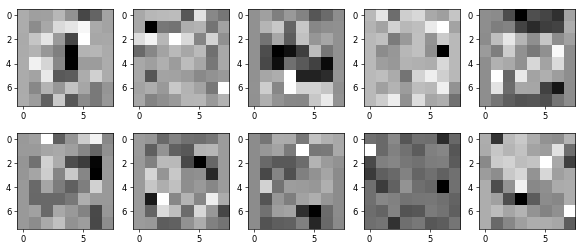

In [32]:
%%time

from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter=100, solver="liblinear", multi_class="auto")
logit.fit(digits.data, digits.target)

imshow_arrays(logit.coef_)

I know; this looks like garbage at first glance. But take a closer look at '2', the third image in the top row. The lighter spots are pixels that are distinctly 2-ish, dark pixels are anti-2. See the dark cluster slightly above and to the left of the center, and the other dark cluster slightly below and to the right? Those are two of the distinctive characteristics of a 2 - it very rarely has ink in those places. It also usually has ink just below and to the left of the center.

Still, though, this data is not very human interpretable. But that's OK as long as the computer knows what it means. The stimulation state of the neurons in your visual cortex is also probably pretty hard to interpret directly; that's OK as long as you think "8" when you see an 8.

# Part 5: Measuring Logit Effectiveness

Let's take the model we just trained and count the number of times each predicted value was associated with each target value. Then we'll plot the coefficients with their predictive accuracy histograms. We'll also store an array of predictions and another of targets to make it easy to calculate the accuracy in the next step.

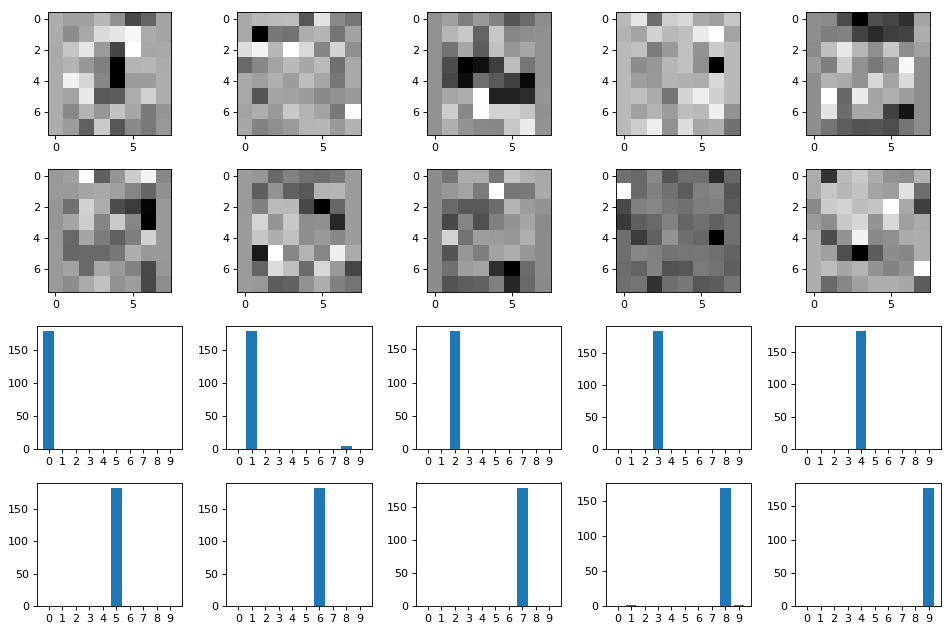

In [22]:
import numpy as np

predictions = logit.predict(digits.data)
targets = digits.target

counts = np.zeros((10,10))
for i in range(len(predictions)):
    counts[predictions[i]][digits.target[i]] += 1

imshow_and_histogram(logit.coef_, counts, 5)


In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(targets, predictions)
print "Accuracy: %0.2f%%" % (100.0 * accuracy)


Accuracy: 99.33%


Victory! Over 99% accuracy! But let's not get too excited; there is a problem. We used the entire dataset to train a model, then used the same data to test it. That is a common flaw in machine learning; we created a model that memorized our training dataset and regurgitated the same answers back. It did not show us how it would respond to character images it had not seen before. We do not know if this model would give us generalizable predictions from novel data.

# Part 6: Train / Test Split

To fix that problem, we will use a train/test split. We will divide our available data into a training set with which we will train our model and a test set that we will use to evaluate its accuracy.

In the sections above where we created and trained a model in a couple lines of code, it may have seemed anti-climactic. Machine learning is such a cool field and it all comes down to two lines of code?!? Well, certainly there is a lot of work that goes into creating the libraries, but few ML engineers spend a significant amount of time writing algorithms. And there is more work in constructing and tuning more complex algorithms. But still, most of the work in machine learning is data science; getting the data into a form that ensures the algorithms do something useful. Splitting data into training and test sets is an important example of that work.

We will use a simple random split with 25% of the data reserved for test. Since we are exploring the process, we will set a fixed initial random_state so that we have repeatable results.

In [33]:
%%time

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=1)

logit = LogisticRegression(max_iter=100, solver="liblinear", multi_class="auto")
logit.fit(X_train, y_train)

CPU times: user 205 ms, sys: 0 ns, total: 205 ms
Wall time: 205 ms


# Part 7: Logit Evaluation With The Test Data

Now we can do the evaluation using the test data. Let's also collect the predicted and actual values so we can calculate an accuracy score in the final step.

CPU times: user 1.69 s, sys: 15.8 ms, total: 1.71 s
Wall time: 1.52 s


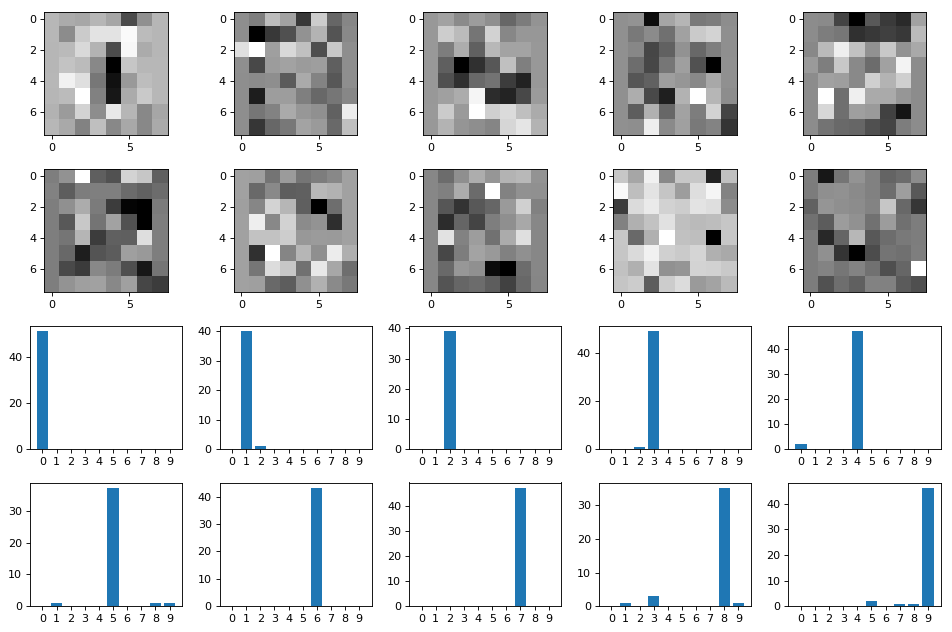

In [34]:
predictions = logit.predict(X_test)
targets = y_test

counts = np.zeros((10,10))
for i in range(len(predictions)):
    counts[predictions[i]][targets[i]] += 1

imshow_and_histogram(logit.coef_, counts)

That looks like a good result. We trained the model in under a second and got a very high accuracy. Since we used a random train/test split, we can be confident that these results give a fair representation of the actual performance of this model.

# Part 8: Accuracy Score

There are various scoring metrics for ML models. For this one, simple accuracy should suffice. What percentage of our predictions were correct?

In [28]:
accuracy = accuracy_score(targets, predictions)
print "Accuracy: %0.2f%%" % ( 100.0* accuracy)


Accuracy: 96.44%


# Part 9: Results for Scikit-learn Digits

Over 95 percent accuracy at recognizing hand-written digits with less than one second of training. That's pretty cool!

We started with K-Means, which does not require knowledge of the correct answers to the sample set to do clustering. We saw that its results were quite impressive in some cases and lacking in others.

Then we tried another algorithm, Logistic Regression, that took our labels into account when training. And though we used the exact same feature data to train our model, its results were far more accurate since it was given access to the target values.

But we realized that we had probably created an overfit model that had, to some extent, memorized the example data we fed it and replayed the answers when we showed it the same data again.

So we broke up the data into a train/test split. We created a new model that was trained only with the training data and checked its performance against the test data that we reserved. The accuracy was still very good.


# Part 10: Dataset Limitations
At the beginning of this notebook I pointed out that we would be using only the test dataset, because that is what is included with Scikit-learn. It is not an ideal dataset even when we created our own train/test split. The problem is that the entire test set of written examples was created by 13 people. With our random split, we wound up with examples of the same handwriting in both the train and the test split. That probably resulted in overfitting on those people's handwriting styles.

The original dataset from UCI addresses this problem; their training set has samples from 30 people, none of whom were included in the group of 13 people who created the test samples. This is a critical skill in machine learning: Be skeptical of your work. Challenge the data, the algorithms, and the conclusions. Question where it could be wrong, how it could break. Then fix the issues you come up with. We have a problem with our data that probably resulted in overfitting. Let's fix it.

# Part 11: Loading All The Data

In the data directory of this repository, you will find a training dataset (.tra.csv) and a test dataset (.tes.csv). These come from [UC Irvine's Optical Recognition of Handwritten Digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

We will use Pandas to read the CSV files, then slice the matrices into feature matrices (commonly called X) and target vectors (commonly called y).

In [38]:
import os
import pandas as pd

dirpath = os.getcwd()
print("current working directory is : " + dirpath)

def read_data_csv(file, header="infer"):
    read_it = lambda: pd.read_csv("data/" + file, header=header)
    return read_it()

train_dataset = read_data_csv("optdigits.tra.csv", header=None)
test_dataset = read_data_csv("optdigits.tes.csv", header=None)


current working directory is : /home/ec2-user/SageMaker/mlho_01


In [39]:
X_train = train_dataset.values[:,0:64] # all rows, columns 0 to 63 (64 non-inclusive)
y_train = train_dataset.values[:,64] # all rows, column 64 only
X_test = test_dataset.values[:,0:64]
y_test = test_dataset.values[:,64]

# Part 12: Logit Training Again

With the data in memory, and shaped in a fashion that is friendly to the standard Scikit-learn regression interface, it is just a few keystrokes to train our model and get a look at the coefficients. This time they look a lot different from the previous ones. At first glance, I thought something had gone wrong. But no need to get worried until we check the performance.

In [40]:
%%time

logit = LogisticRegression(max_iter=100, solver="liblinear", multi_class="auto")
logit.fit(X_train, y_train)


CPU times: user 921 ms, sys: 0 ns, total: 921 ms
Wall time: 920 ms


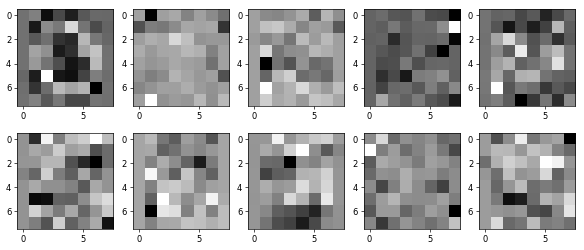

In [41]:

imshow_arrays(logit.coef_)

# Part 13: Testing with The Test Set

Now we can predict the values in the test set and create histograms to get a look at where the model is working and where it has troubles.

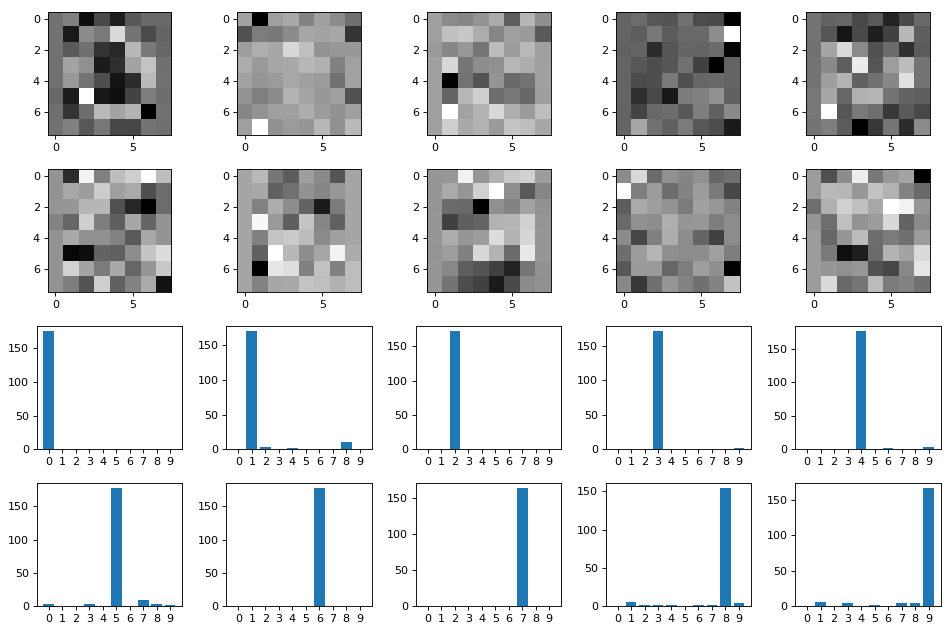

In [42]:
y_pred = logit.predict(X_test)

counts = np.zeros((10,10))
for i in range(len(X_test)):
    counts[y_pred[i]][y_test[i]]+= 1

imshow_and_histogram(logit.coef_, counts)

# Part 14: Checking The Accuracy

Now we can get our final accuracy score.

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print "Accuracy: %0.2f%%" % ( 100.0* accuracy)


Accuracy: 94.71%


Our accuracy with a properly segmented dataset, using the default parameters for Logistic Regression, is 94.71%.

# Part 15: Hyperparameter Optimization

Once you have your algorithm working and you have a proper dataset, you've established your baseline - a starting accuracy figure against which you can measure other approaches. From here you can start on hyperparameter tuning or try some other algorithms.

Hyperparameter tuning is the process of selecting the most effective parameters for your algorithm and dataset. The main hyperparameters in Logistic Regression are the regularization parameter, typically called C, and the solver.

Regularization is used to force the algorithm to prefer more simple solutions, which prevents overfitting to the observed data. In the case of optical character recognition, it keeps the algorithm from assigning extremely high weight to a single pixel that happens to always be the same grayscale level in for a given digit in the training dataset. This prevents overfitting as a result of coincidentally or unintentially biased data.

The solver is the algorithm used for gradient descent in seeking the model with the least error. There are a variety of solvers, each of which has different problems for which it works best.

First let's try adding a significant amount of regularization. The smaller the parameter, the more it will regularize the model.


In [44]:
%%time

logit = LogisticRegression(C=0.05, max_iter=100, solver="liblinear", multi_class="auto")
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
print "Accuracy: %0.2f%%" % ( 100.0* accuracy_score(y_test, y_pred))

Accuracy: 95.10%
CPU times: user 442 ms, sys: 0 ns, total: 442 ms
Wall time: 441 ms


That improved our accuracy by 0.39% and made it run in about half the time. Nice!

Next we'll switch to a more advanced solver.

In [46]:
%%time

logit = LogisticRegression(C=0.05, solver='saga', max_iter=200, multi_class="auto")
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
print "Accuracy: %0.2f%%" % ( 100.0* accuracy_score(y_test, y_pred))

Accuracy: 95.38%
CPU times: user 3.15 s, sys: 0 ns, total: 3.15 s
Wall time: 3.15 s


That is a more complicated change. The accuracy improved by 0.28%, but it took 7 times as long to run. If we plan to train once and run the model for a long time or if the value of being right is high, that cost is a good investment. But that will not always be the case.

# Part 16: Conclusion

We started with an example dataset that comes with Python and used the supervised learning Logistic Regression. The first attempt had excellent accuracy, but when we challenged our implementation, we found that we were memorizing the data because we trained on the test set.

That led us to think about the quality of our dataset. First we split our data randomly into train and test sets and got more realistic results. Then we challenged our dataset again, questioning whether it was fair to have people in the test set who were also in the training set. We went to the original source to get data that was split on individuals so we didn't contaminate our input data with handwriting that would be seen in the output set.

In the end we scored 94.71% with default settings and 95.38% with regularization and a better solver.

Most importantly, I hope this exercise showed you that machine learning is something you can do. You can go as far as you want with it and it can become extremely challenging, but there is a beginners path that will be rewarding right from the outset of your journey.
